# Data Cleaning & Visualization Pipeline
This notebook demonstrates the process:
**Raw CSV → Cleaned Dataset → Visual Insights**


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw_orders.csv")
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         122 non-null    float64
 1   user_id          84 non-null     object 
 2   signup_date      122 non-null    object 
 3   order_date       122 non-null    object 
 4   country          123 non-null    object 
 5   state            48 non-null     object 
 6   city             122 non-null    object 
 7   product          122 non-null    object 
 8   category         122 non-null    object 
 9   unit_price       122 non-null    object 
 10  quantity         112 non-null    object 
 11  discount         101 non-null    object 
 12  shipping_cost    110 non-null    object 
 13  currency         97 non-null     object 
 14  payment_method   122 non-null    object 
 15  is_first_order   105 non-null    object 
 16  referral_source  80 non-null     object 
 17  coupon_code     

order_id            1
user_id            39
signup_date         1
order_date          1
country             0
state              75
city                1
product             1
category            1
unit_price          1
quantity           11
discount           22
shipping_cost      13
currency           26
payment_method      1
is_first_order     18
referral_source    43
coupon_code        53
total              27
notes              17
dtype: int64

In [45]:
df = df.dropna(subset=["order_id", "order_date"])

In [46]:
df["discount"] = df["discount"].replace({"—": np.nan, "N/A": np.nan, "": np.nan})
df["discount"] = df["discount"].fillna("0")


In [47]:
for col in ["country", "state", "city", "currency", "payment_method"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({"—": np.nan, "": np.nan})
    )


In [48]:
def parse_money(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()
    s = (s.str.replace(r'(?i)\busd|eur|gbp|\$|€|£', '', regex=True)
           .str.replace(r'(?i)free|calculated at checkout', '', regex=True)
           .str.replace(',', '.', regex=False)
           .str.replace(r'\s+', '', regex=True))
    return pd.to_numeric(s, errors="coerce")

df["unit_price_num"] = parse_money(df["unit_price"])
df["shipping_cost_num"] = parse_money(df["shipping_cost"])
df["total_num"] = parse_money(df["total"])


In [49]:
word_to_int = {"one":1, "two":2, "three":3, "ten":10}
q = df["quantity"].astype(str).str.strip().str.lower()
q = q.replace(word_to_int)
q = q.str.replace(r'%', '', regex=True)
q = q.replace({"": np.nan, "—": np.nan})
pd.to_numeric(..., errors="coerce")


Ellipsis

In [50]:
df["signup_dt"] = pd.to_datetime(df["signup_date"], errors="coerce")

df["order_dt"]  = pd.to_datetime(df["order_date"],  errors="coerce")


In [51]:
truthy = {"1","true","yes","y","t"}
falsy  = {"0","false","no","n","f"}

s = df["is_first_order"].astype(str).str.strip().str.lower()
df["is_first_order_bool"] = np.where(s.isin(truthy), True,
                               np.where(s.isin(falsy), False, np.nan))


In [52]:
assert df["order_id"].isna().sum() == 0
assert df["unit_price_num"].dtype.kind in "fi"


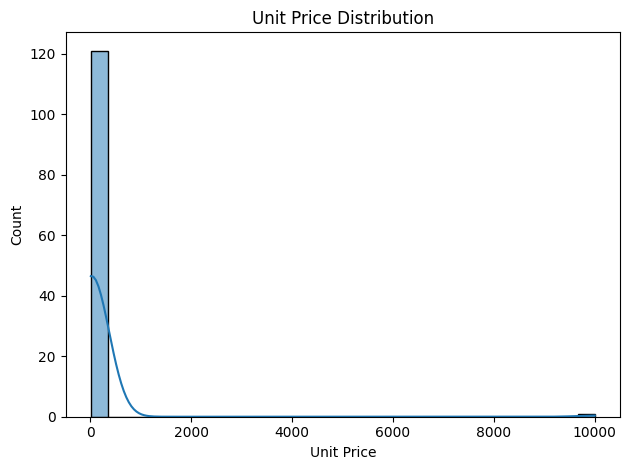

In [53]:
sns.histplot(df["unit_price_num"].dropna(), bins=30, kde=True)
plt.title("Unit Price Distribution")
plt.xlabel("Unit Price"); plt.ylabel("Count")
plt.tight_layout(); plt.show()


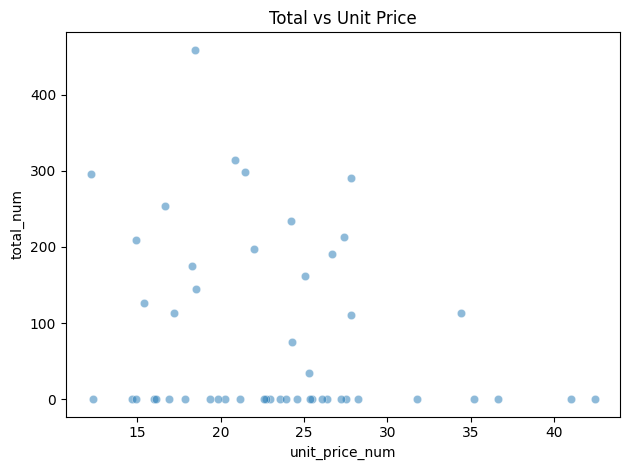

In [54]:
sns.scatterplot(data=df, x="unit_price_num", y="total_num", alpha=0.5)
plt.title("Total vs Unit Price")
plt.tight_layout(); plt.show()


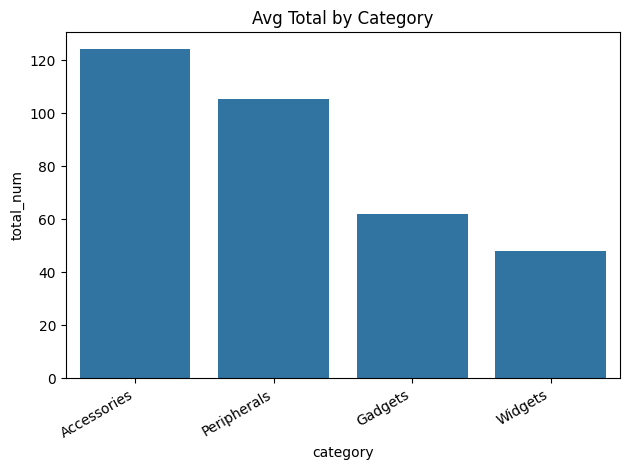

In [55]:
top_cats = (df.groupby("category", dropna=False)["total_num"]
              .mean()
              .sort_values(ascending=False)
              .head(10)
              .reset_index())
sns.barplot(data=top_cats, x="category", y="total_num")
plt.title("Avg Total by Category")
plt.xticks(rotation=30, ha="right")
plt.tight_layout(); plt.show()


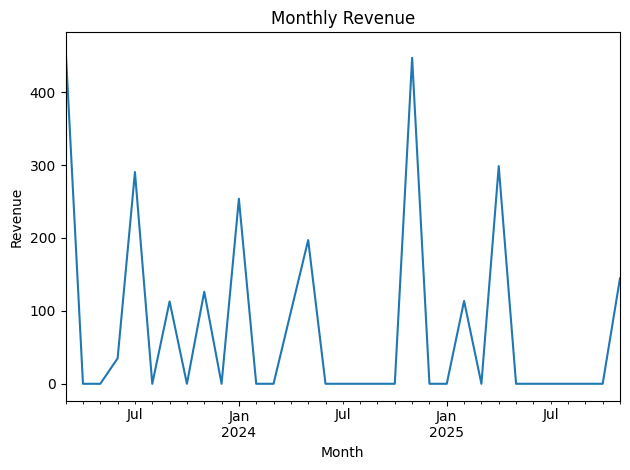

In [56]:
orders_by_month = (df.dropna(subset=["order_dt"])
                     .assign(month=lambda d: d["order_dt"].dt.to_period("M"))
                     .groupby("month")["total_num"]
                     .sum()
                     .sort_index())
orders_by_month.plot(kind="line")
plt.title("Monthly Revenue")
plt.xlabel("Month"); plt.ylabel("Revenue")
plt.tight_layout(); plt.show()


In [57]:
df["unit_price_log"] = np.log1p(df["unit_price_num"].clip(lower=0))


In [58]:
df_clean = df.copy()
df_clean.to_csv("../data/processed/clean_orders.csv", index=False)


In [60]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 122
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             122 non-null    float64       
 1   user_id              84 non-null     object        
 2   signup_date          122 non-null    object        
 3   order_date           122 non-null    object        
 4   country              122 non-null    object        
 5   state                114 non-null    object        
 6   city                 122 non-null    object        
 7   product              122 non-null    object        
 8   category             122 non-null    object        
 9   unit_price           122 non-null    object        
 10  quantity             112 non-null    object        
 11  discount             122 non-null    object        
 12  shipping_cost        109 non-null    object        
 13  currency             122 non-null    obj